In [146]:
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [147]:
eps = np.random.normal(0, 0.2 ** 0.5, 500)

In [148]:
x = np.linspace(0, 50, 500)
y = np.array([0.5 * x[i] + 1 + eps[i] for i in range(0, 500)])

In [149]:
import matplotlib.pyplot as plt

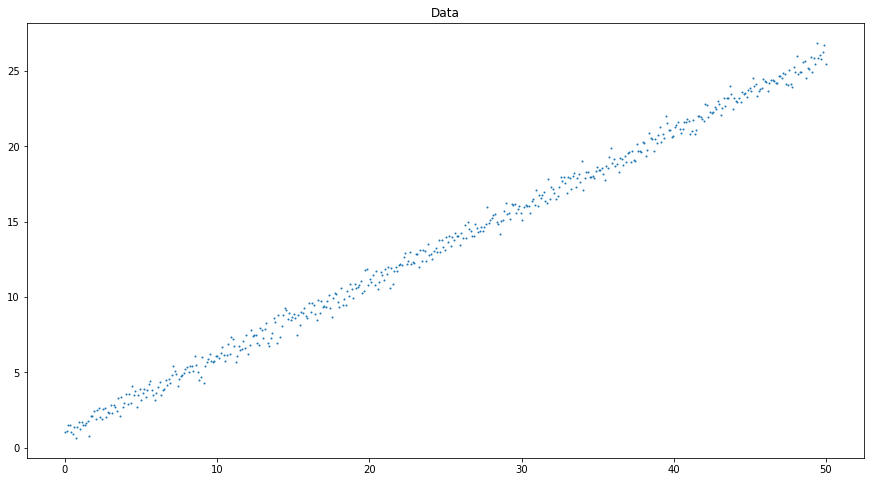

In [150]:
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=1)
plt.title('Data')
plt.show()

In [151]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from scipy.optimize import minimize

In [152]:
def MSE(vector):
    return mean_squared_error([vector[0] * i + vector[1] for i in x], y)
def MAE(vector):
    return mean_absolute_error([vector[0] * i + vector[1] for i in x], y)

In [153]:
mse_param = minimize(MSE,[1,1])

In [154]:
print("k = %f, b = %f" % (mse_param.x[0], mse_param.x[1]))

k = 0.500522, b = 1.002433


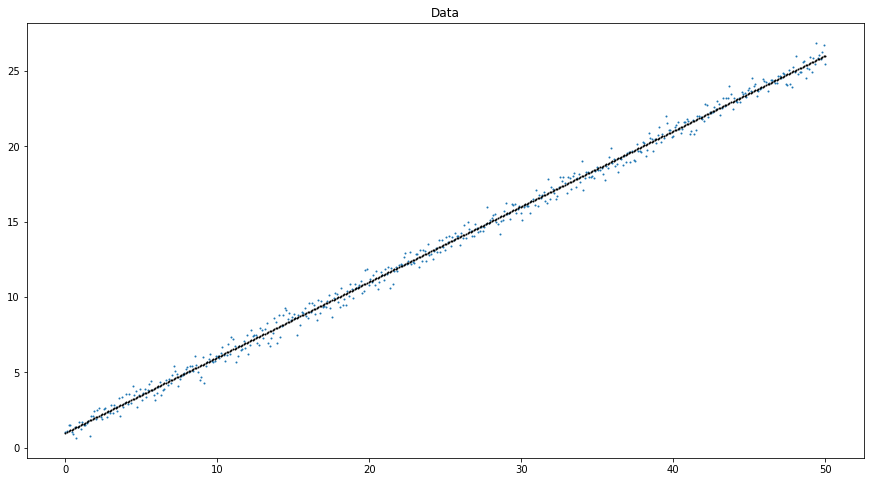

In [155]:
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=1)
plt.scatter(x, [mse_param.x[0]*i + mse_param.x[1]  for i in x], color = 'black', s = 1)
plt.title('Data')
plt.show()

In [156]:
x_mistake = np.random.uniform(0.0, 50.0, 75)
eps_mistake = np.random.normal(0, 0.2 ** 0.5, 75)
x = np.append(x, x_mistake)
y = np.append(y, [-1.0 + eps_mistake[i] for i in x_mistake])

In [157]:
mse_param = minimize(MSE,[1,1])
mae_param = minimize(MAE,[1,1])

In [158]:
print("k = %f, b = %f" % (mse_param.x[0], mse_param.x[1]))

k = 0.450880, b = 0.431555


In [159]:
print("k = %f, b = %f" % (mae_param.x[0], mae_param.x[1]))

k = 0.500969, b = 0.922559


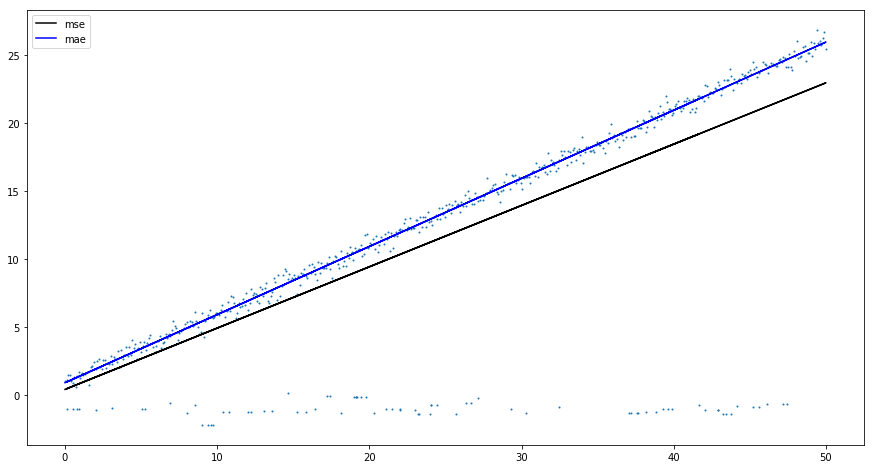

In [160]:
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=1)
plt.plot(x, [mse_param.x[0]*i + mse_param.x[1]  for i in x], color = 'black', label = 'mse')
plt.plot(x, [mae_param.x[0]*i + mae_param.x[1]  for i in x], color = 'blue', label = 'mae')
plt.legend()
plt.show()

MAE более усточив к выбросам, т.к. "штрафует" меньше чем MSE.